In [65]:
from collections import defaultdict, deque
from igraph import Graph as PlottableGraph, plot, layout, Plot

In [22]:
class Graph(object):
    def __init__(self):
        self.adj = defaultdict(lambda: [])
        self.nodes = set()
    def add_edge(self, a, b):
        self.adj[a].append(b)
        self.nodes.add(a)
        self.nodes.add(b)

    def draw(self, root):
        graph = PlottableGraph(directed=True)
        figure = Plot(bbox=(800, 600))
        for name in self.nodes:
            graph.add_vertex(name=name, label=name)
        for name, neighbors in self.adj.items():
            for neighbor in neighbors:
                graph.add_edge(name, neighbor, color="black")
        for vv in graph.vs:
            if vv.attributes()["name"] == root:
                root = vv.index
                break
                    
        figure.add(graph, layout=graph.layout("kk"), margin = 100,
                          vertex_label_dist=1, root=root)
        return figure

In [23]:
g = Graph()
g.add_edge("START", "study_hard")
g.add_edge("study_hard", "grad_school")
g.add_edge("study_hard", "start_a_business")
g.add_edge("start_a_business", "happy_life")

g.add_edge("grad_school", "fear_of_being_expelled")
g.add_edge("fear_of_being_expelled", "apply_for_funding")
g.add_edge("apply_for_funding", "work_hard")
g.add_edge("work_hard", "publish")
g.add_edge("publish", "out_of_funding")
g.add_edge("out_of_funding", "fear_of_being_expelled")

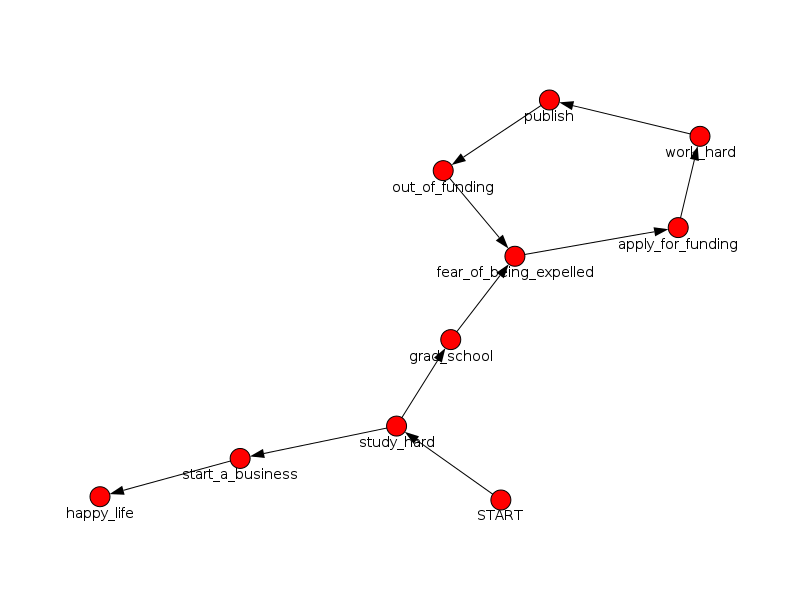

In [24]:
g.draw(root="START")

# DFS

In [92]:
def dfs(graph, start):
    visited = {}
    def recurse(node):
        print(node)
        for neighbor in graph.adj[node]:
            if neighbor not in visited:
                visited[neighbor] = True
                recurse(neighbor)
    recurse(start)

In [93]:
dfs(g, "START")

START
study_hard
grad_school
fear_of_being_expelled
apply_for_funding
work_hard
publish
out_of_funding
start_a_business
happy_life


# Cycle detection

In [60]:
# now ancestors is a set of nodes on "DFS tree"
# path from start node to current node. 

def ensure_no_cycle(graph, start):
    visited = {}
    ancestors = set()
    
    def recurse(node):
        ancestors.add(node)
        print(node)
        for neighbor in graph.adj[node]:
            if neighbor not in visited:
                visited[neighbor] = True
                recurse(neighbor)
            elif neighbor in ancestors:
                raise Exception("Cycle")
        ancestors.remove(node)
    recurse(start)

## Proof cycle detection works
1. Back edge $\Rightarrow$ cycle: trivial
2. Cycle $\Rightarrow$ backedge:

Look at the first node discovered by DFS from that cycle $u$

Let's consider a cycle $C$. Let $v$ be the first node on $C$ visited by DFS and $u$ we see on $C$ when we follow edges from $v$. We know that $u$ is descendant of $v$ in DFS tree, because of the fact that by assumption $u$ was not yet visited when we entered $v$ and there is a path from $v$ to $u$ (and DFS will always follow unexplored paths). Also edge $u \rightarrow v$ cannot be a part of DFS tree, so it must be a back edge.

In [61]:
ensure_no_cycle(g, "START")

START
study_hard
grad_school
fear_of_being_expelled
apply_for_funding
work_hard
publish
out_of_funding


Exception: Cycle

In [79]:
def recover_cycle(graph, start):
    visited = {}
    ancestors = set()
    path = deque()
    cycle_end = [None]
    
    def recurse(node):
        ancestors.add(node)
        path.append(node)
        for neighbor in graph.adj[node]:
            if neighbor not in visited:
                visited[neighbor] = True
                recurse(neighbor)
            elif neighbor in ancestors:
                cycle_end[0] = neighbor
                raise Exception("Cycle")
        path.pop(node)
        ancestors.pop(node)
    try:
        recurse(start)
    except:
        while path[0] != cycle_end[0]:
            path.popleft()
        return path

In [78]:
recover_cycle(g, "START")

deque(['fear_of_being_expelled',
       'apply_for_funding',
       'work_hard',
       'publish',
       'out_of_funding'])

# BFS and DFS are close cousins really.

In [86]:
def bfs_from(graph, source):
    q = deque()
    # initially source is on the queue
    distance = {source: 0}
    q.appendleft(source)
    # while queue is not empty
    while len(q) > 0:
        # consider the node that has been in the queue for
        # the longest
        node = q.popleft()
        # for all neighbours
        for neighbour in graph.adj[node]:
            # if they were NOT visted yet
            if neighbour not in distance:
                # mark their distance and put them on queue
                distance[neighbour] = distance[node] + 1
                q.append(neighbour)
    return distance

In [95]:
def bfs_from(graph, source):
    q = deque()
    distance = {source: 0}
    q.appendleft(source)
    while len(q) > 0:
        node = q.popleft()
        print(node)
        for neighbour in graph.adj[node]:
            if neighbour not in distance:
                distance[neighbour] = distance[node] + 1
                q.append(neighbour)
    return distance

def dfs_from(graph, source):
    q = deque()
    distance = {source: 0}
    q.appendleft(source)
    while len(q) > 0:
        node = q.pop()   # only change!
        print(node)
        for neighbour in reversed(graph.adj[node]): # ok fine
            if neighbour not in distance:
                distance[neighbour] = distance[node] + 1
                q.append(neighbour)
    return distance

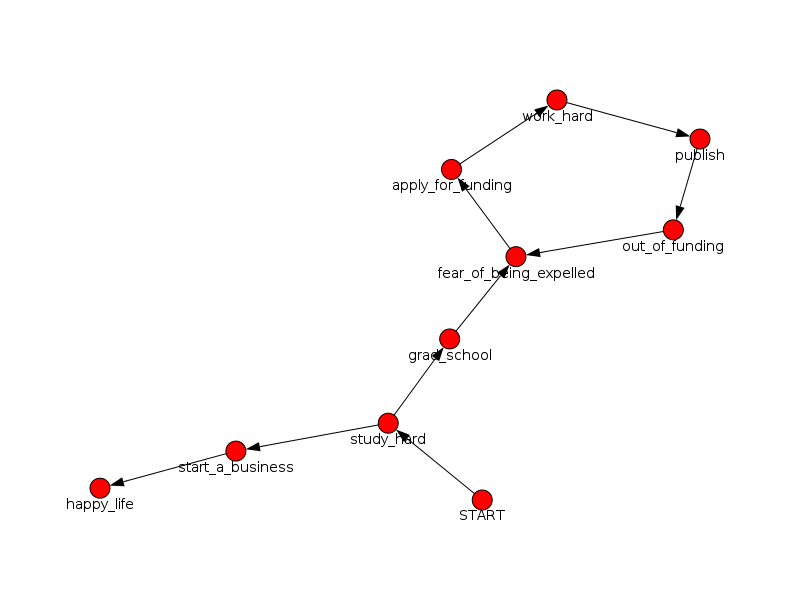

In [100]:
g.draw(root="START")

In [98]:
_ = bfs_from(g, "START") # iterative DFS

START
study_hard
grad_school
start_a_business
fear_of_being_expelled
happy_life
apply_for_funding
work_hard
publish
out_of_funding


In [96]:
_ = dfs_from(g, "START") # iterative DFS

START
study_hard
grad_school
fear_of_being_expelled
apply_for_funding
work_hard
publish
out_of_funding
start_a_business
happy_life


In [97]:
dfs(g, "START")

START
study_hard
grad_school
fear_of_being_expelled
apply_for_funding
work_hard
publish
out_of_funding
start_a_business
happy_life


# Topological sort

In [108]:
g = Graph()
g.add_edge("intersections.cpp", "geometry.o")
g.add_edge("triangles.cpp", "geometry.o")
g.add_edge("utils.cpp", "geometry.o")

g.add_edge("utils.cpp", "random.o")

g.add_edge("neural_network.cpp", "ai.o")
g.add_edge("behavioral_model.cpp", "ai.o")
g.add_edge("utils.cpp", "ai.o")
g.add_edge("random.o", "ai.o")

g.add_edge("geometry.o", "game.o")
g.add_edge("ai.o", "game.o")

g.add_edge("queue_server.cpp", "queue_server.o")

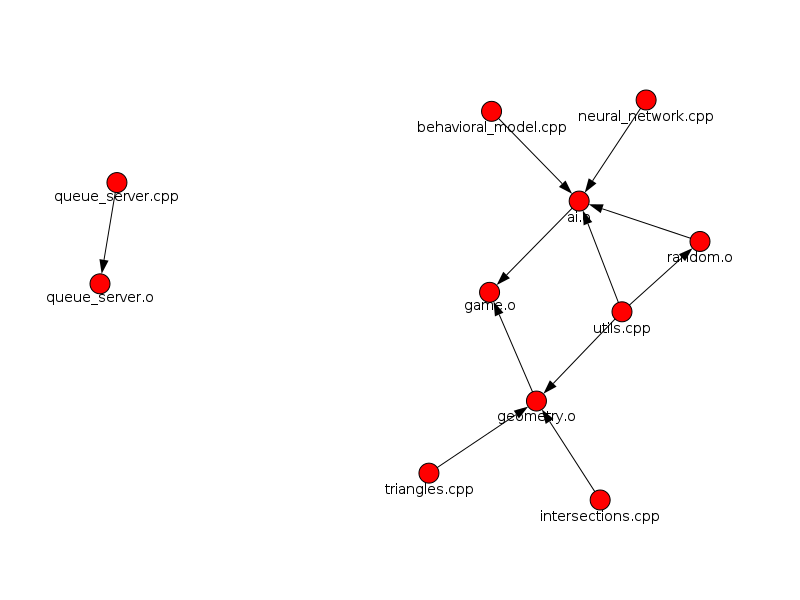

In [109]:
g.draw(root="")

In [138]:
def topological_sort(graph):
    visited = {}
    result = []
    def recurse(node):
        for neighbor in graph.adj[node]:
            if neighbor not in visited:
                visited[neighbor] = True
                recurse(neighbor)
        result.append(node)
    
    for potential_start in graph.nodes:
        if potential_start not in visited:
            visited[potential_start] = True
            recurse(potential_start)
    return list(reversed(result))

In [139]:
topological_sort(g)

['triangles.cpp',
 'behavioral_model.cpp',
 'neural_network.cpp',
 'utils.cpp',
 'random.o',
 'ai.o',
 'intersections.cpp',
 'geometry.o',
 'game.o',
 'queue_server.cpp',
 'queue_server.o']

In [130]:
def topological_nondfs(graph):
    indegree = {node:0 for node in graph.nodes}
    
    for node in graph.nodes:
        for neighbor in graph.adj[node]:
            indegree[neighbor] += 1
    
    enabled = [node for node in graph.nodes
                    if indegree[node] == 0]
    result = []
    while len(enabled) > 0:
        node = enabled.pop()
        result.append(node)
        for neighbor in graph.adj[node]:
            indegree[neighbor] -= 1
            if indegree[neighbor] == 0:
                enabled.append(neighbor)
   
    return result

In [131]:
topological_nondfs(g)

['triangles.cpp',
 'behavioral_model.cpp',
 'neural_network.cpp',
 'utils.cpp',
 'random.o',
 'ai.o',
 'intersections.cpp',
 'geometry.o',
 'game.o',
 'queue_server.cpp',
 'queue_server.o']